In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [42]:
df = pd.read_csv("https://raw.githubusercontent.com/vnnyx/uts-visdat/master/Data%20Set%201.csv")
df.head()

,date,new_tested,acc_tested,new_confirmed,acc_confirmed,acc_negative,being_checked,isolated
0,02-Mar-20,339,339,2,2,335,2,2
1,03-Mar-20,2,341,0,2,337,2,2
2,04-Mar-20,31,372,0,2,356,14,2
3,05-Mar-20,16,388,0,2,371,15,2
4,06-Mar-20,62,450,2,4,422,24,4


In [43]:
df['date'] = pd.to_datetime(df.date)
df.head()

,date,new_tested,acc_tested,new_confirmed,acc_confirmed,acc_negative,being_checked,isolated
0,2020-03-02,339,339,2,2,335,2,2
1,2020-03-03,2,341,0,2,337,2,2
2,2020-03-04,31,372,0,2,356,14,2
3,2020-03-05,16,388,0,2,371,15,2
4,2020-03-06,62,450,2,4,422,24,4


## **SOAL 1**

### **Dengan menggunakan line plot, tampilkan perbandingan jumlah akumulatif tes sampel, terkonfirmasi positif dan terkonfirmasi negatif untuk periode waktu yang tersedia.**

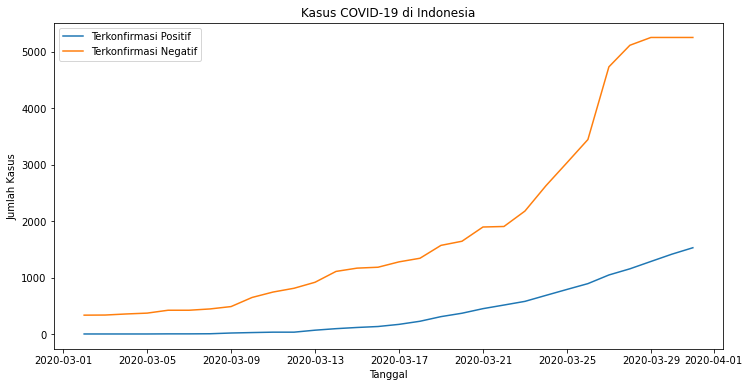

In [44]:
plt.figure(figsize=(12,6))
plt.plot(df.date, df.acc_confirmed, label="Terkonfirmasi Positif")
plt.plot(df.date, df.acc_negative, label="Terkonfirmasi Negatif")
plt.legend()
plt.title("Kasus COVID-19 di Indonesia")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Kasus")
plt.show()

## **SOAL 2**

### **Hitunglah nilai positive rate dan negative rate untuk masing-masing waktu.**

Positive rate = (Jumlah terkonfirmasi positif / Jumlah tes sampel) × 100%

Negative rate = (Jumlah terkonfirmasi negatif Jumlah tes sampel) × 100%

In [45]:
df["positive_rate"] = (df['acc_confirmed']/df['acc_tested']*100)
df["negative_rate"] = (df['acc_negative']/df['acc_tested']*100)
df.head()

,date,new_tested,acc_tested,new_confirmed,acc_confirmed,acc_negative,being_checked,isolated,positive_rate,negative_rate
0,2020-03-02,339,339,2,2,335,2,2,0.589971,98.820059
1,2020-03-03,2,341,0,2,337,2,2,0.586510,98.826979
2,2020-03-04,31,372,0,2,356,14,2,0.537634,95.698925
3,2020-03-05,16,388,0,2,371,15,2,0.515464,95.618557
4,2020-03-06,62,450,2,4,422,24,4,0.888889,93.777778


### **Dengan menggunakan bar plot, tampilkan perbandingan positivity rate dan negativity rate untuk periode waktu yang tersedia.**

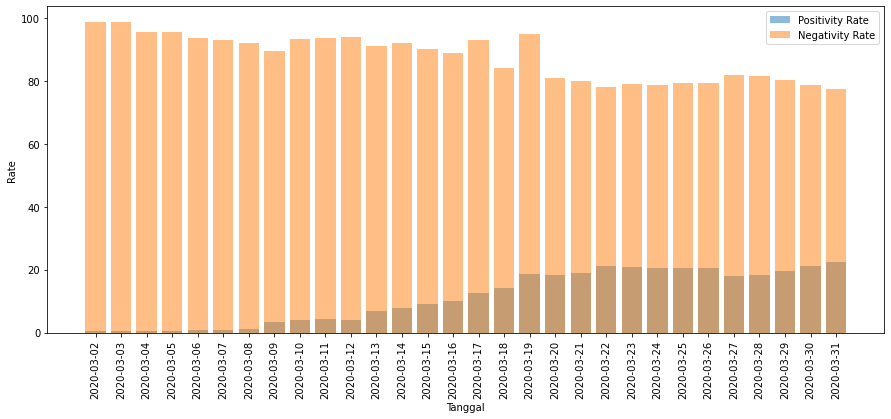

In [46]:
plt.figure(figsize=(15,6))
plt.bar(df.date, df.positive_rate, linewidth=3, alpha=0.5 ,label="Positivity Rate")
plt.bar(df.date, df.negative_rate, linewidth=0, alpha=0.5, label="Negativity Rate")
plt.legend()
plt.yticks()
plt.xticks(df.date, rotation=90)
plt.xlabel("Tanggal")
plt.ylabel("Rate")
plt.show()

### **Pada tanggal berapa nilai positive rate menunjukkan nilai tertinggi?**

Nilai positive rate tertinggi terjadi pada tanggal 2020-03-31 atau 31 Maret 2020

### **Pada tanggal berapa nilai negative rate menunjukkan nilai tertinggi?**

Nilai negative rate tertinggi terjadi pad tanggal 2020-03-03 atau 3 Maret 2020

## **SOAL 3**

### **Dengan menggunakan heatmap, tunjukkan korelasi antar variabel yang ada pada dataset.**

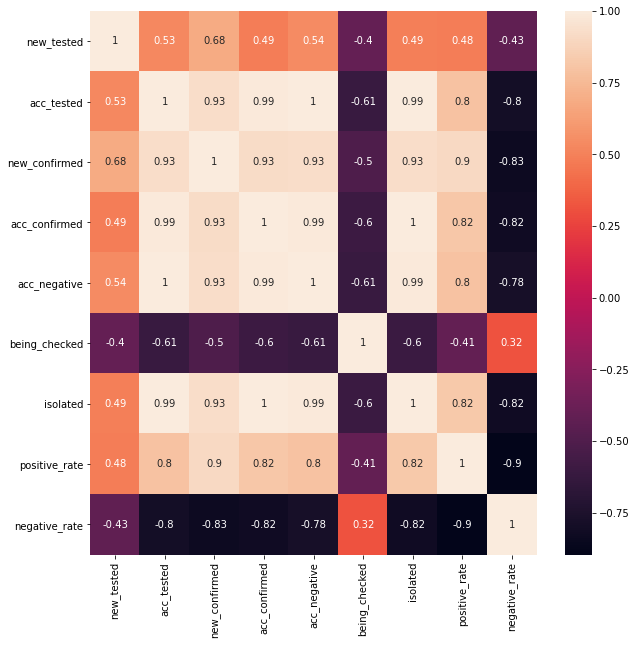

In [47]:
cor = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor, annot=True)
plt.show()

### **Tentukan variabel-variabel yang memiliki nilai korelasi paling positif, dan berikan penjelasan terkait nilai korelasi tersebut**


Korelasi positif adalah apabila hubungan suatu varibel bersifat searah,  korelasi yang memiliki nilai korelasi paling positif sudah pasti korelasi antar variabel yang sama, namun selain itu terdapat korelasi paling positif antar variabel yang berbeda diantaranya adalah :
1. acc_negative dengan acc_tested dengan nilai korelasi 1
2. acc_confirmed dengan isolated dengan nilai korelasi 1

Nilai korelasi ini menunjukkan seberapa kuat hubungan antar variabel, semakin mendekati nilai 1 (korelasi positif) maka semakin tinggi pula hubungannya

**Note : Nilai korelasi positif antar variabel lainnya bisa dilihat pada heatmap**

### **Tentukan variabel-variabel yang memiliki nilai korelasi paling negatif, dan berikan penjelasan terkait nilai korelasi tersebut**

Korelasi negatif adalah apabila hubungan antar suatu varibel bersifat berlawan arah, korelasi yang memiliki nilai korelasi paling negatif adalah korelasi antara positive_rate dengan negative_rate

Nilai korelasi ini menunjukkan seberapa kuat hubungan antar variabel, semakin mendekati -1 (korelasi negatif) maka semakin tinggi pula hubungan antara variabelnya

**Note : Nilai korelasi negatif antar variabel lainnya bisa dilihat pada heatmap**

In [48]:
df = pd.read_csv("https://raw.githubusercontent.com/vnnyx/uts-visdat/master/Data%20Set%202.csv")
df.head()

,province_id,province_name,island,iso_code,capital_city,population,population_kmsquare,confirmed,deceased,released,longitude,latitude
0,1,Aceh,Sumatra,AC,Banda Aceh,4906835,86,4,0,0,9.672.895,3.869.994
1,2,Bali,Kepulauan Nusa Tenggara,BA,Denpasar,4104900,738,9,2,0,11.512.255,-825.731
2,3,Banten,Jawa,BT,Serang,11704877,1298,84,4,1,106.160.889,-6.315.299
3,4,Bengkulu,Sumatra,BE,Bengkulu,1844800,93,0,0,0,102.315.674,-3.414.725
4,5,DI Yogyakarta,Jawa,YO,Yogyakarta,3553100,1134,22,2,1,110.390.625,-7.863.382


## **SOAL 4**

### **Hitunglah nilai persentase perbandingan jumlah terkonfirmasi positif terhadap populasi per km2 untuk masing-masing provinsi.**

In [49]:
df["persentase"] = (df['confirmed']/df['population_kmsquare']*100)
df.head()

,province_id,province_name,island,iso_code,capital_city,population,population_kmsquare,confirmed,deceased,released,longitude,latitude,persentase
0,1,Aceh,Sumatra,AC,Banda Aceh,4906835,86,4,0,0,9.672.895,3.869.994,4.651163
1,2,Bali,Kepulauan Nusa Tenggara,BA,Denpasar,4104900,738,9,2,0,11.512.255,-825.731,1.219512
2,3,Banten,Jawa,BT,Serang,11704877,1298,84,4,1,106.160.889,-6.315.299,6.471495
3,4,Bengkulu,Sumatra,BE,Bengkulu,1844800,93,0,0,0,102.315.674,-3.414.725,0.000000
4,5,DI Yogyakarta,Jawa,YO,Yogyakarta,3553100,1134,22,2,1,110.390.625,-7.863.382,1.940035


### **Dengan menggunakan bar plot, tampilkan perbandingan nilai persentase tersebut untuk masing-masing provinsi.**

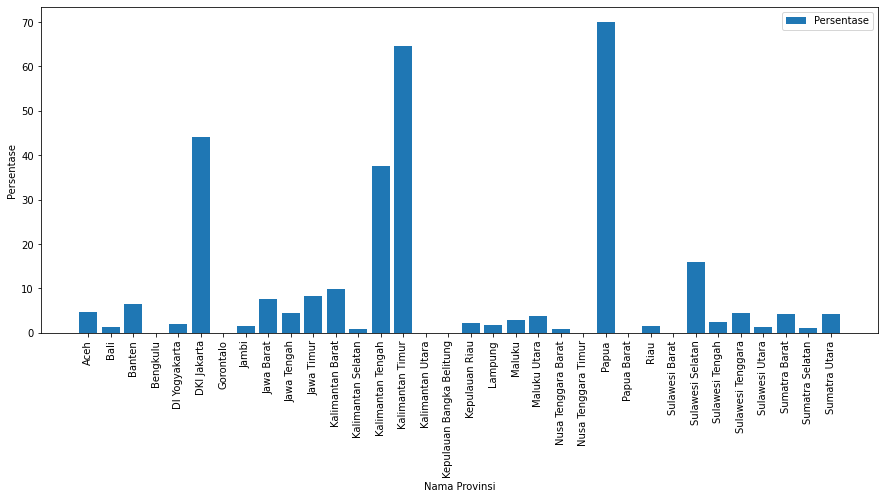

In [50]:
plt.figure(figsize=(15,6))
plt.bar(df.province_name, df.persentase, linewidth=3, label="Persentase")
plt.legend()
plt.yticks()
plt.xticks(df.province_name, rotation=90)
plt.xlabel("Nama Provinsi")
plt.ylabel("Persentase")
plt.show()

### **Tampilkan 3 provinsi dengan nilai persentasi terbesar beserta nilai persentasenya**

In [51]:
df[['province_name', 'persentase']].nlargest(3, 'persentase')

,province_name,persentase
23,Papua,70.000000
14,Kalimantan Timur,64.705882
5,DKI Jakarta,44.198078


## **SOAL 5**

### **Dengan menggunakan pie chart, tampilkan persentase jumlah terkonfimasi positif untuk masing-masing pulau.**

In [52]:
jawa = df[(df.island=="Jawa")]
persentase_jawa = ((jawa.confirmed.sum()/jawa.population_kmsquare.sum())*100)
print(persentase_jawa)

13.2355077727735


In [53]:
sumatra = df[(df.island=="Sumatra")]
persentase_sumatra = ((sumatra.confirmed.sum()/sumatra.population_kmsquare.sum())*100)
print(persentase_sumatra)

2.307080350039777


In [54]:
nt = df[(df.island=="Kepulauan Nusa Tenggara")]
persentase_nt = ((nt.confirmed.sum()/nt.population_kmsquare.sum())*100)
print(persentase_nt)

1.0156971375807942


In [55]:
sulawesi = df[(df.island=="Sulawesi")]
persentase_sulawesi = ((sulawesi.confirmed.sum()/sulawesi.population_kmsquare.sum())*100)
print(persentase_sulawesi)

5.54675118858954


In [56]:
kalimantan = df[(df.island=="Kalimantan")]
persentase_kalimantan = ((kalimantan.confirmed.sum()/kalimantan.population_kmsquare.sum())*100)
print(persentase_kalimantan)

11.578947368421053


In [57]:
km = df[(df.island=="Kepulauan Maluku")]
persentase_km = ((km.confirmed.sum()/km.population_kmsquare.sum())*100)
print(persentase_km)

3.278688524590164


In [58]:
papua = df[(df.island=="Papua")]
persentase_papua = ((papua.confirmed.sum()/papua.population_kmsquare.sum())*100)
print(persentase_papua)

58.333333333333336


In [59]:
df_persentase = pd.DataFrame({
    'nama_provinsi':['Sumatra', 'Kepulauan Nusa Tenggara', 'Jawa', 
    'Sulawesi', 'Kalimantan', 'Kepulauan Maluku', 'Papua'],
    'persentase':[persentase_sumatra, persentase_nt, persentase_jawa, persentase_sulawesi, 
    persentase_kalimantan, persentase_km, persentase_papua]
})
df_persentase

,nama_provinsi,persentase
0,Sumatra,2.307080
1,Kepulauan Nusa Tenggara,1.015697
2,Jawa,13.235508
3,Sulawesi,5.546751
4,Kalimantan,11.578947
5,Kepulauan Maluku,3.278689
6,Papua,58.333333


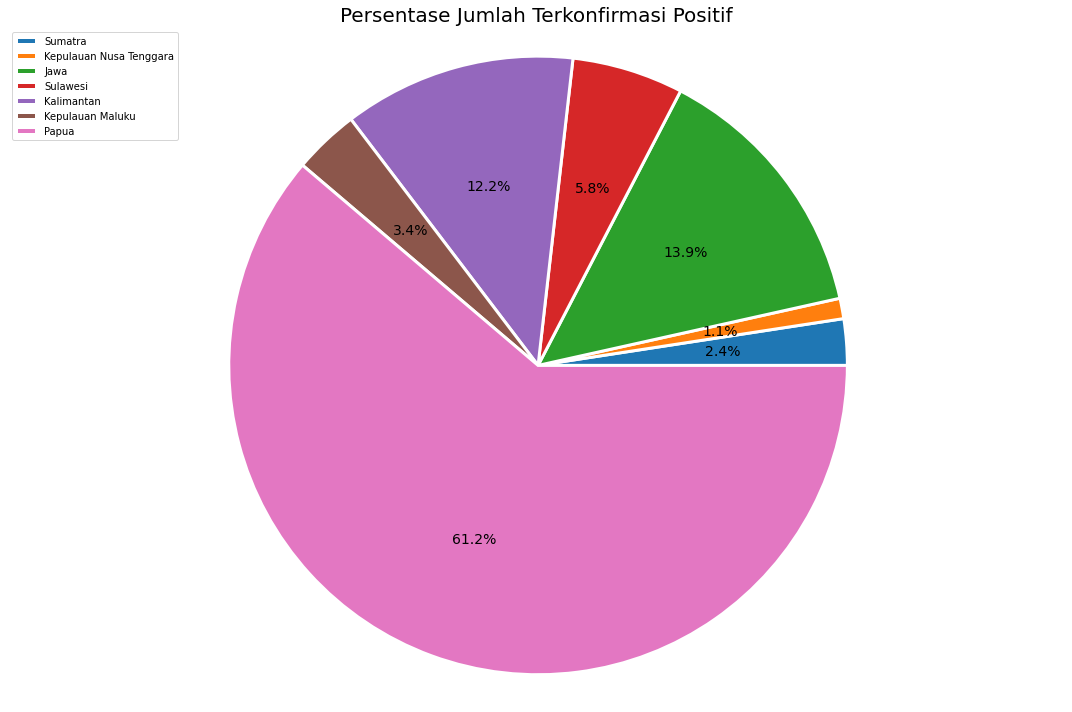

In [60]:
labels = 'Sumatra', 'Kepulauan Nusa Tenggara', 'Jawa', 'Sulawesi', 'Kalimantan', 'Kepulauan Maluku', 'Papua'
persentase = [persentase_sumatra, persentase_nt, persentase_jawa, persentase_sulawesi, persentase_kalimantan, persentase_km, persentase_papua]

fig1, ax1 = plt.subplots(figsize=(15,10))
patches, texts, pcts = ax1.pie(persentase, labels=None, autopct='%1.1f%%', 
wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
textprops={'size': 'x-large'})
ax1.axis('equal')
plt.title("Persentase Jumlah Terkonfirmasi Positif", fontsize=20)
plt.legend(labels=labels, loc='upper left')
plt.setp(pcts, fontsize = 14)
plt.tight_layout()
plt.show()